In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import *
from tqdm import tqdm
from numba import njit
import random

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["figure.dpi"] = 100
plt.set_cmap("binary_r")

<Figure size 1400x800 with 0 Axes>

# Boids model
Consider a flock of birds. If they are located in a too dense area, then they want to repell each other. 
At some intermediate distance, for example in a distance where they can see. each other, then birds will get attracted to each other and move in the same direction. In the same time, the flock will also try to cluster to the center of mass. The behvaior can be summarized as:
1. Separation
2. Alignment 
3. Cohesion

In [99]:
np.random.seed(42)

r1, r2, r3 = 2, 4, 5
N = 10 # Number of particles
x1, x2 = -5, 5
v1, v2 = -1, 1

xy = np.random.uniform(x1, x2, [N, 2]) 
v  = np.random.uniform(v1, v2, [N, 2])

def get_euclidian_distance(positions): # (N, 2) -> (N, N, 2) -> (N, N)
    separation = positions[:,None] - positions[None]
    pair_wise_distance = np.linalg.norm(separation, axis=-1, ord=2)
    return pair_wise_distance # Adjacency matrix for an weighted undirected graph where each edge correspond to a distance

def repulsion_vectors(xy, distance, repelling_indices):
    separation = xy[:, None] - xy[None]
    repelling_separation = separation * repelling_indices[..., None]
    R = -np.sum(repelling_separation, axis=1)
    return R

def alignment_vectors(v, distance, alignment_indices):
    alignment_neighbors = v[:, None] * alignment_indices[..., None]
    avg_neighbor_velocity = np.sum(alignment_neighbors, axis=1) 
    A = avg_neighbor_velocity - v
    return A

def cohesion_vectors(xy, distance, attracting_indices):
    attracting_neighbors = xy[:, None] * attracting_indices[..., None]
    avg_neighbor_position = np.sum(attracting_neighbors, axis=1) / (np.sum(attracting_indices, axis=1)[:, None] + 1e-9)
    C = avg_neighbor_position - xy
    return C

distance = get_euclidian_distance(xy)
repelling_indices  = (distance < r1) * (distance != 0)
alignment_indices  = (distance > r1) * (distance < r2)
attracting_indices = (distance > r2) * (distance < r3)

R = repulsion_vectors(xy, distance, repelling_indices)
A = alignment_vectors(v, distance, alignment_indices)
C = cohesion_vectors(xy, distance, attracting_indices)

In [97]:
# Define weight factors for each rule
repelling_weight = 1.0
alignment_weight = 1.0
cohesion_weight = 1.0

# Update velocities
v += S * separation_weight + A * alignment_weight + C * cohesion_weight

# Update positions
xy += v


array([[-0.        , -0.        ],
       [-1.3087893 ,  1.09414094],
       [ 0.25806327,  0.2740999 ],
       [-0.37499118,  1.03733706],
       [ 1.3087893 , -1.09414094],
       [ 0.37499118, -1.03733706],
       [-0.        , -0.        ],
       [-0.25806327, -0.2740999 ],
       [-0.        , -0.        ],
       [-0.        , -0.        ]])

In [98]:
A

array([[ 0.44741158, -1.44202456],
       [ 0.        ,  0.        ],
       [-0.08786003,  0.57035192],
       [ 0.        ,  0.        ],
       [ 0.18482914, -0.90709917],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.93126407,  0.6167947 ],
       [-1.17231738, -2.41396732],
       [ 0.73693211, -0.23939003]])

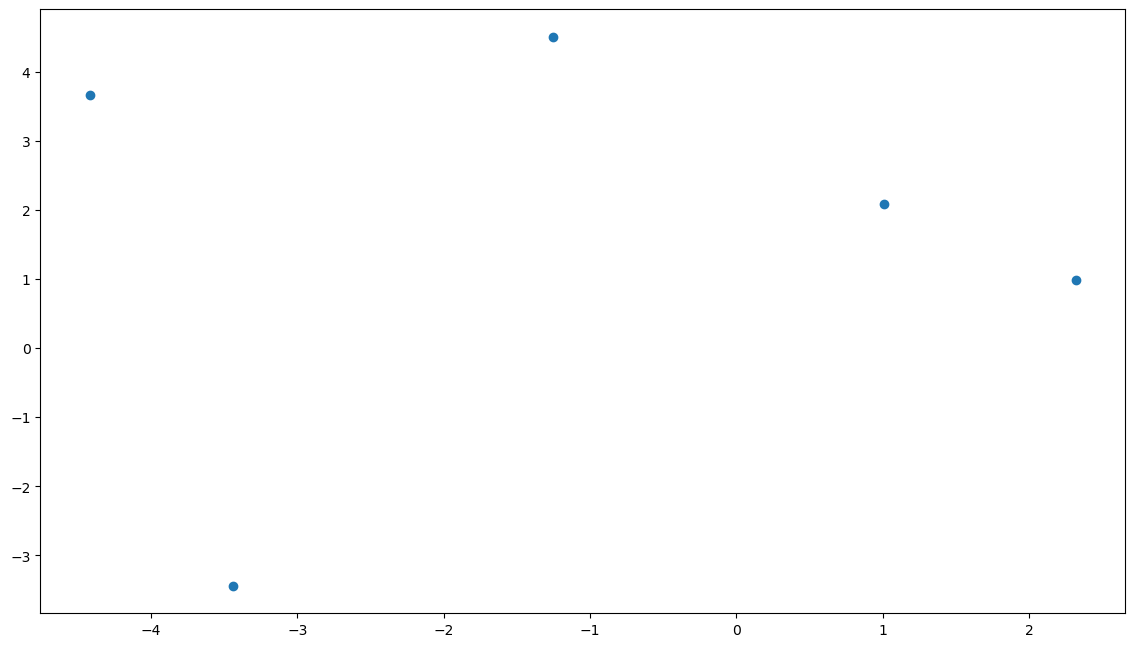

In [89]:
# Now we know the identity of the particles that would repell, align and attract.
# So we need to use these indices to update the velocities

plt.plot(*xy.T, "o")